# Part 1

In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
# Print column names to confirm correctness
# print(data.columns)

# Calculate monthly returns
data['Return_HSB'] = (data['HSB'] - data['HSB'].shift(1)) / data['HSB'].shift(1)
data['Return_AIA'] = (data['AIA'] - data['AIA'].shift(1)) / data['AIA'].shift(1)
# Drop NaN values
data = data.dropna()
# Calculate expected returns
expected_return_hsb = data['Return_HSB'].mean()
expected_return_aia = data['Return_AIA'].mean()
# Calculate standard deviation
std_dev_hsb = data['Return_HSB'].std()
std_dev_aia = data['Return_AIA'].std()
# Create results DataFrame
results = pd.DataFrame({
    'Bank': ['Hang Seng Bank', 'AIA'],
    'Expected Return': [expected_return_hsb, expected_return_aia],
    'Standard Deviation': [std_dev_hsb, std_dev_aia]
})
results = results.set_index('Bank').T
# Print the transposed results table
print(results)
# Save the results to a file
#results.to_csv("expected_returns_and_std_dev_transposed.csv")


Bank                Hang Seng Bank       AIA
Expected Return           0.007559  0.019073
Standard Deviation        0.062924  0.067147


#Part 2

Correlation between Hang Seng Bank and AIA: 0.5883253376576869


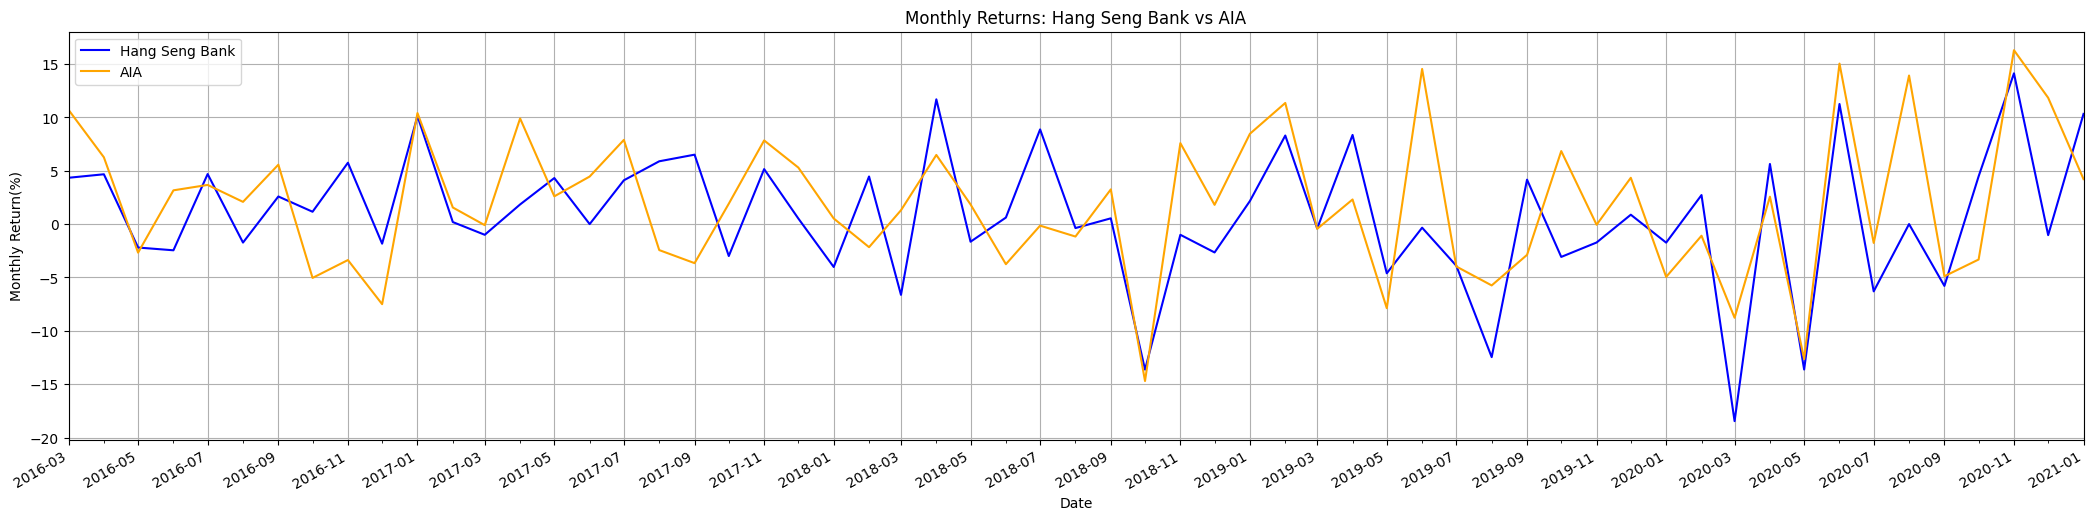

The correlation is positive, indicating that the monthly returns of Hang Seng Bank and AIA tend to move in the same direction.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Read data file
data = pd.read_csv("data.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', dayfirst=True)
# Calculate monthly returns
data['Return_HSB'] = (data['HSB'] - data['HSB'].shift(1)) / data['HSB'].shift(1) *100
data['Return_AIA'] = (data['AIA'] - data['AIA'].shift(1)) / data['AIA'].shift(1)  *100
data = data.dropna()
# Compute correlation
correlation = data['Return_HSB'].corr(data['Return_AIA'])
print("Correlation between Hang Seng Bank and AIA:", correlation)
# Plot monthly returns
plt.figure(figsize=(26, 6))
plt.plot(data['Date'], data['Return_HSB'], label='Hang Seng Bank', color='blue')
plt.plot(data['Date'], data['Return_AIA'], label='AIA', color='orange')
# Set title and labels
plt.title('Monthly Returns: Hang Seng Bank vs AIA')
plt.xlabel('Date')
plt.ylabel('Monthly Return(%)')
plt.legend()
plt.grid()
# Set x-axis date format and interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every two months
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks for each month
plt.xlim(pd.Timestamp('2016-03-01'), pd.Timestamp('2021-1-1'))
# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
plt.show()
# Interpret the correlation with respect to the graph
if correlation > 0:
    print("The correlation is positive, indicating that the monthly returns of Hang Seng Bank and AIA tend to move in the same direction.")
elif correlation < 0:
    print("The correlation is negative, indicating that the monthly returns of Hang Seng Bank and AIA tend to move in opposite directions.")
else:
    print("The correlation is zero, indicating no relationship between the monthly returns of Hang Seng Bank and AIA.")


# Part 3

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['% return HSB'] = (data['HSB'] - data['HSB'].shift(1)) / data['HSB'].shift(1)
data['% return AIA'] = (data['AIA'] - data['AIA'].shift(1)) / data['AIA'].shift(1)
data = data.dropna()
# Portfolio of 65% HSB and 35% AIA
weights = np.array([0.65, 0.35])
# Calculate variance of the portfolio return
returns = data[['% return HSB', '% return AIA']]
std_devs = returns.std()
correlation = returns.corr().iloc[0, 1]
portfolio_variance = (weights[0]**2 * std_devs.iloc[0]**2 +
                      weights[1]**2 * std_devs.iloc[1]**2 +
                      2 * correlation * weights[0] * weights[1] * std_devs.iloc[0] * std_devs.iloc[1])
# #Calculate Standard Deviation of the portfolio return
portfolio_std_dev = np.sqrt(portfolio_variance)
print(f"Variance of the portfolio return: {portfolio_variance:.4f}")
print(f"Standard Deviation of the portfolio return: {portfolio_std_dev:.4f}")



Variance of the portfolio return: 0.0034
Standard Deviation of the portfolio return: 0.0579
